In [1]:
import numpy as np
import sys
sys.path.append('../../../../')
from src import kernel

In [2]:
import seaborn as sns

# MCMC

target dist

In [3]:
def f(x):
    return np.exp(-(x-3.)**2 / (2.*4))

In [4]:
x = np.linspace(-5,10,100)

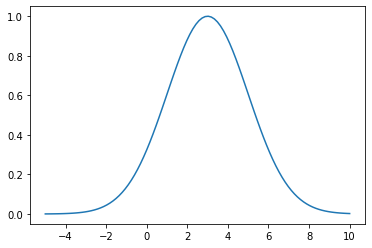

In [5]:
sns.lineplot(x,f(x))

# Metropolis hesting method

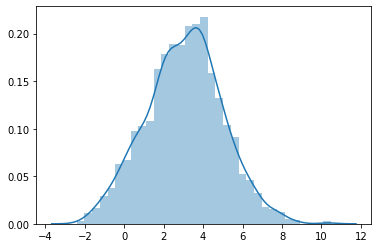

In [6]:
mcmc = kernel.sampling.MCMC.Metropolis(f=f,ndim=1,sample_rate=50,proposal_std=10)
sns.distplot(mcmc.sampling(3000,1000))

# Hamiltonian Monte Carlo method

In [7]:
logf = lambda x: np.log(f(x))
grad_logf = lambda x: -2*(x-3.) / (2.*4)

In [8]:
hmc = kernel.sampling.MCMC.Hamiltonian(logf,grad_logf,ndim=1,initial_position=0.,T=100,eps=0.01,tau=1.)

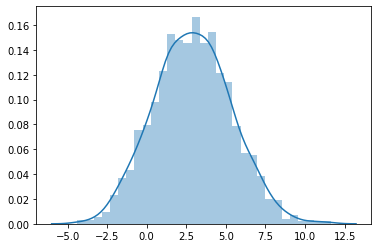

In [9]:
sns.distplot(hmc.sampling(2000))

# MCMC sampling from kernel mean

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
df = pd.read_csv('../../../..//src/kernel/data/test_data1.csv')

target dist

In [17]:
bw = kernel.utils.functions.band_width(data=df,method='scott')
KM = kernel.Mean(df,cov=bw.cov)

x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)
z = KM.kernel_mean(np.array([xx.ravel(),yy.ravel()]).T)
zz = z.reshape(xx.shape[0],-1)

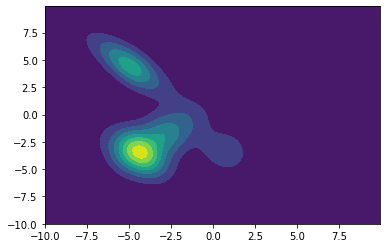

In [18]:
plt.contourf(xx,yy,zz)

In [19]:
logp = lambda x: np.log(KM.kernel_mean(x)[0])
def grad_logp(x):
    N = KM.data.shape[0]
    return ((KM.grad_kernel_mean(x)/(KM.kernel_mean(x)))/np.float(N)).ravel()

# Metropolis hesting method

In [20]:
mcmc = kernel.sampling.MCMC.Metropolis(f=KM.kernel_mean,ndim=2,sample_rate=50,proposal_std=10)
sampling_met = mcmc.sampling(2000,1000)

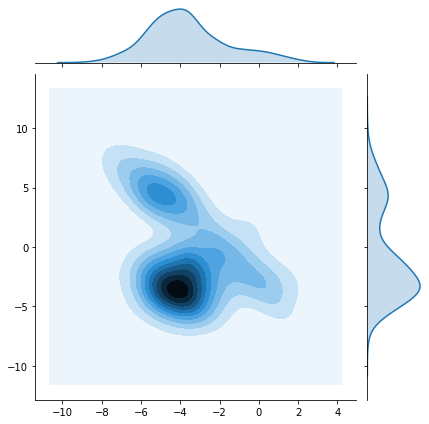

In [21]:
sns.jointplot(x=sampling_met[:,0], y=sampling_met[:,1], kind='kde')

# Hamiltonian Monte Carlo method

In [22]:
logp = lambda x: np.log(KM.kernel_mean(x)[0])
def grad_logp(x):
    N = KM.data.shape[0]
    return (KM.grad_kernel_mean(x)/(KM.kernel_mean(x))).ravel()

In [23]:
hmc = kernel.sampling.MCMC.Hamiltonian(logp,grad_logp,ndim=2,initial_position=np.array([0.,0.]),T=100,eps=0.01,tau=1.)
sampling_hmc = hmc.sampling(2000,WarmUp=1000)

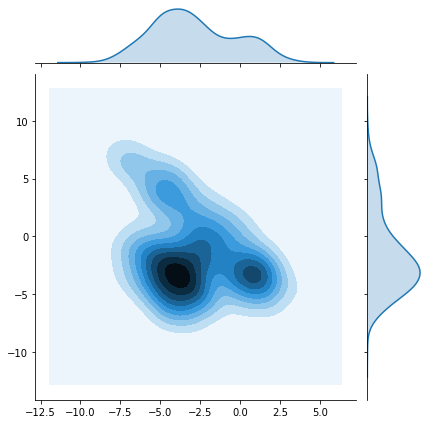

In [24]:
sns.jointplot(x=sampling_hmc[:,0], y=sampling_hmc[:,1], kind='kde')